In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import csv
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from sklearn.impute import SimpleImputer

%matplotlib inline
import ipynb.fs.defs.functions as func

In [2]:
CORRELATION_THRESHOLD = 0.9
register_matplotlib_converters()
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('pd_speech_features.csv', sep=",", decimal='.', header=[0,1])
data.head(5)

,Unnamed: 0_level_0,Unnamed: 1_level_0,Baseline Features,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Intensity Parameters,Unnamed: 24_level_0,Unnamed: 25_level_0,Formant Frequencies,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Bandwidth Parameters,Unnamed: 31_level_0,Unnamed: 32_level_0,Unnamed: 33_level_0,Vocal Fold,Unnamed: 35_level_0,Unnamed: 36_level_0,Unnamed: 37_level_0,Unnamed: 38_level_0,Unnamed: 39_level_0,Unnamed: 40_level_0,Unnamed: 41_level_0,Unnamed: 42_level_0,Unnamed: 43_level_0,Unnamed: 44_level_0,Unnamed: 45_level_0,Unnamed: 46_level_0,Unnamed: 47_level_0,Unnamed: 48_level_0,Unnamed: 49_level_0,Unnamed: 50_level_0,Unnamed: 51_level_0,Unnamed: 52_level_0,Unnamed: 53_level_0,Unnamed: 54_level_0,Unnamed: 55_level_0,MFCC,Unnamed: 57_level_0,Unnamed: 58_level_0,Unnamed: 59_level_0,Unnamed: 60_level_0,Unnamed: 61_level_0,Unnamed: 62_level_0,Unnamed: 63_level_0,Unnamed: 64_level_0,Unnamed: 65_level_0,Unnamed: 66_level_0,Unnamed: 67_level_0,Unnamed: 68_level_0,Unnamed: 69_level_0,Unnamed: 70_level_0,Unnamed: 71_level_0,Unnamed: 72_level_0,Unnamed: 73_level_0,Unnamed: 74_level_0,Unnamed: 75_level_0,Unnamed: 76_level_0,Unnamed: 77_level_0,Unnamed: 78_level_0,Unnamed: 79_level_0,Unnamed: 80_level_0,Unnamed: 81_level_0,Unnamed: 82_level_0,Unnamed: 83_level_0,Unnamed: 84_level_0,Unnamed: 85_level_0,Unnamed: 86_level_0,Unnamed: 87_level_0,Unnamed: 88_level_0,Unnamed: 89_level_0,Unnamed: 90_level_0,Unnamed: 91_level_0,Unnamed: 92_level_0,Unnamed: 93_level_0,Unnamed: 94_level_0,Unnamed: 95_level_0,Unnamed: 96_level_0,Unnamed: 97_level_0,Unnamed: 98_level_0,Unnamed: 99_level_0,Unnamed: 100_level_0,Unnamed: 101_level_0,Unnamed: 102_level_0,Unnamed: 103_level_0,Unnamed: 104_level_0,Unnamed: 105_level_0,Unnamed: 106_level_0,Unnamed: 107_level_0,Unnamed: 108_level_0,Unnamed: 109_level_0,Unnamed: 110_level_0,Unnamed: 111_level_0,Unnamed: 112_level_0,Unnamed: 113_level_0,Unnamed: 114_level_0,Unnamed: 115_level_0,Unnamed: 116_level_0,Unnamed: 117_level_0,Unnamed: 118_level_0,Unnamed: 119_level_0,Unnamed: 120_level_0,Unnamed: 121_level_0,Unnamed: 122_level_0,Unnamed: 123_level_0,Unnamed: 124_level_0,Unnamed: 125_level_0,Unnamed: 126_level_0,Unnamed: 127_level_0,Unnamed: 128_level_0,Unnamed: 129_level_0,Unnamed: 130_level_0,Unnamed: 131_level_0,Unnamed: 132_level_0,Unnamed: 133_level_0,Unnamed: 134_level_0,Unnamed: 135_level_0,Unnamed: 136_level_0,Unnamed: 137_level_0,Unnamed: 138_level_0,Unnamed: 139_level_0,Wavelet Features,Unnamed: 141_level_0,Unnamed: 142_level_0,Unnamed: 143_level_0,Unnamed: 144_level_0,Unnamed: 145_level_0,Unnamed: 146_level_0,Unnamed: 147_level_0,Unnamed: 148_level_0,Unnamed: 149_level_0,Unnamed: 150_level_0,Unnamed: 151_level_0,Unnamed: 152_level_0,Unnamed: 153_level_0,Unnamed: 154_level_0,Unnamed: 155_level_0,Unnamed: 156_level_0,Unnamed: 157_level_0,Unnamed: 158_level_0,Unnamed: 159_level_0,Unnamed: 160_level_0,Unnamed: 161_level_0,Unnamed: 162_level_0,Unnamed: 163_level_0,Unnamed: 164_level_0,Unnamed: 165_level_0,Unnamed: 166_level_0,Unnamed: 167_level_0,Unnamed: 168_level_0,Unnamed: 169_level_0,Unnamed: 170_level_0,Unnamed: 171_level_0,Unnamed: 172_level_0,Unnamed: 173_level_0,Unnamed: 174_level_0,Unnamed: 175_level_0,Unnamed: 176_level_0,Unnamed: 177_level_0,Unnamed: 178_level_0,Unnamed: 179_level_0,Unnamed: 180_level_0,Unnamed: 181_level_0,Unnamed: 182_level_0,Unnamed: 183_level_0,Unnamed: 184_level_0,Unnamed: 185_level_0,Unnamed: 186_level_0,Unnamed: 187_level_0,Unnamed: 188_level_0,Unnamed: 189_level_0,Unnamed: 190_level_0,Unnamed: 191_level_0,Unnamed: 192_level_0,Unnamed: 193_level_0,Unnamed: 194_level_0,Unnamed: 195_level_0,Unnamed: 196_level_0

In [4]:
# Rename the columns for a more appealing view
prev_col_name = ''
column_names = []
for c in data.columns:
    if not c[0].startswith('Unnamed'):
        prev_col_name = c[0]
    column_names.append(f'{prev_col_name}-{c[1]}')
column_names[-1] = 'class'
data.columns = column_names

In [5]:
data.head()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

## Standardize variables

In [6]:
for c in data.columns[2:-1]:
    data[c] = (data[c] - data[c].mean()) / data[c].std()
data.head()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

## Single Variable Analysis

In [7]:
# Top variables with missing values:
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()

top_missing = sorted(mv.items(), key=operator.itemgetter(1), reverse=True)
if any([nb_missing for nb_missing in mv.values()]):
    print(top_missing)
else:
    print('No missing values in the whole dataset!')

No missing values in the whole dataset!


In [8]:
# Very informative...
data.describe()

,-id,-gender,Baseline Features-PPE,Baseline Features-DFA,Baseline Features-RPDE,Baseline Features-numPulses,Baseline Features-numPeriodsPulses,Baseline Features-meanPeriodPulses,Baseline Features-stdDevPeriodPulses,Baseline Features-locPctJitter,Baseline Features-locAbsJitter,Baseline Features-rapJitter,Baseline Features-ppq5Jitter,Baseline Features-ddpJitter,Baseline Features-locShimmer,Baseline Features-locDbShimmer,Baseline Features-apq3Shimmer,Baseline Features-apq5Shimmer,Baseline Features-apq11Shimmer,Baseline Features-ddaShimmer,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-meanNoiseToHarmHarmonicity,Baseline Features-meanHarmToNoiseHarmonicity,Intensity Parameters-minIntensity,Intensity Parameters-maxIntensity,Intensity Parameters-meanIntensity,Formant Frequencies-f1,Formant Frequencies-f2,Formant Frequencies-f3,Formant Frequencies-f4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Vocal Fold-GQ_prc5_95,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-GNE_std,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GNE_NSR_TKEO,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_mean,Vocal Fold-VFER_std,Vocal Fold-VFER_entropy,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-IMF_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_SEO,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_entropy,MFCC -mean_Log_energy,MFCC -mean_MFCC_0th_coef,MFCC -mean_MFCC_1st_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_MFCC_4th_coef,MFCC -mean_MFCC_5th_coef,MFCC -mean_MFCC_6th_coef,MFCC -mean_MFCC_7th_coef,MFCC -mean_MFCC_8th_coef,MFCC -mean_MFCC_9th_coef,MFCC -mean_MFCC_10th_coef,MFCC -mean_MFCC_11th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_delta_log_energy,MFCC -mean_0th_delta,MFCC -mean_1st_delta,MFCC -mean_2nd_delta,MFCC -mean_3rd_delta,MFCC -mean_4th_delta,MFCC -mean_5th_delta,MFCC -mean_6th_delta,MFCC -mean_7th_delta,MFCC -mean_8th_delta,MFCC -mean_9th_delta,MFCC -mean_10th_delta,MFCC -mean_11th_delta,MFCC -mean_12th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_delta_delta_0th,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta_delta,MFCC -mean_3rd_delta_delta,MFCC -mean_4th_delta_delta,MFCC -mean_5th_delta_delta,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta_delta,MFCC -mean_8th_delta_delta,MFCC -mean_9th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -mean_12th_delta_delta,MFCC -std_Log_energy,MFCC -std_MFCC_0th_coef,MFCC -std_MFCC_1st_coef,MFCC -std_MFCC_2nd_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_MFCC_4th_coef,MFCC -std_MFCC_5th_coef,MFCC -std_MFCC_6th_coef,MFCC -std_MFCC_7th_coef,MFCC -std_MFCC_8th_coef,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_11th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_delta_log_energy,MFCC -std_0th_delta,MFCC -std_1st_delta,MFCC -std_2nd_delta,MFCC -std_3rd_delta,MFCC -std_4th_delta,MFCC -std_5th_delta,MFCC -std_6th_delta,MFCC -std_7th_delta,MFCC -std_8th_delta,MFCC -std_9th_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -std_12th_delta,MFCC -std_delta_delta_log_energy,MFCC -std_delta_delta_0th,MFCC -std_1st_delta_delta,MFCC -std_2nd_delta_delta,MFCC -std_3rd_delta_delta,MFCC -std_4th_delta_delta,MFCC -std_5th_delta_delta,MFCC -std_6th_delta_delta,MFCC -std_7th_delta_delta,MFCC -std_8th_delta_delta,MFCC -std_9th_delta_delta,MFCC -std_10th_delta_delta,MFCC -std_11th_delta_delta,MFCC -std_12th_delta_delta,Wavelet Features-Ea,Wavelet Features-Ed_1_coef,Wavelet Features-Ed_2_coef,Wavelet Features-Ed_3_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ed_5_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed_8_coef,Wavelet Features-Ed_9_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_shannon_1_coef,Wavelet Features-det_entropy_shannon_2_coef,Wavelet Features-det_entropy_shannon_3_coef,Wavelet Features-det_entropy_shannon_4_coef,

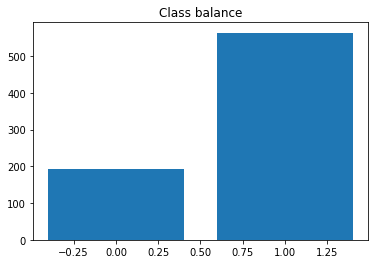

Minority class: 564
Majority class: 192
Proportion: 2.94 : 1


In [9]:
y = data[['class']]

target_count = pd.value_counts(y.values.flatten())
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

## As we don't know much about the variables and it's would be almost impossible to analyze the behaviour of all the 755 variables let's select some important ones and do exploratory analysis on them

#### Let's explore the correlation between those variables and remove some that are very correlated within the classes

In [10]:
def get_important_column_names(df, correlation_threshold=0):
    superclasses = list(dict.fromkeys([c.split('-')[0] for c in df.columns]))
    groups = {c: [] for c in superclasses}
    for c in df.columns:
        groups[c.split('-')[0]].append(c)
    
    important_columns = []
    for i, (group_name, columns) in enumerate(groups.items()):
        corr_matrix = df[columns].corr().abs()                                               # Calculate the correlation within group
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  # Select upper triangle of correlation matrix
        to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
        to_keep = list(set(columns) - set(to_drop))
        important_columns += to_keep
        
#         # Plot the correlation
#         if i == 0 or i == len(groups.values()) - 1 or len(columns) > 10:
#             continue
#         fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 30))
#         axes[0].set_title(f'In-group correlation for {group_name}')
#         sns.heatmap(corr_matrix, ax=axes[0], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
#         corr_matrix = df[to_keep].corr().abs()
#         axes[1].set_title('Correlation between the kept variables')
#         sns.heatmap(corr_matrix, ax=axes[1], xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True, cmap='Blues', square=True)
        
#         fig.tight_layout()
#         plt.show()
    return important_columns


importants = get_important_column_names(data, correlation_threshold=CORRELATION_THRESHOLD)
importants = data[importants]
print(importants.shape)
importants.head()

(756, 391)


,-id,-gender,Baseline Features-stdDevPeriodPulses,Baseline Features-PPE,Baseline Features-meanAutoCorrHarmonicity,Baseline Features-RPDE,Baseline Features-meanPeriodPulses,Baseline Features-meanHarmToNoiseHarmonicity,Baseline Features-locShimmer,Baseline Features-DFA,Baseline Features-numPulses,Baseline Features-locPctJitter,Intensity Parameters-maxIntensity,Intensity Parameters-minIntensity,Formant Frequencies-f3,Formant Frequencies-f4,Formant Frequencies-f1,Formant Frequencies-f2,Bandwidth Parameters-b3,Bandwidth Parameters-b4,Bandwidth Parameters-b1,Bandwidth Parameters-b2,Vocal Fold-VFER_mean,Vocal Fold-GNE_SNR_TKEO,Vocal Fold-VFER_SNR_TKEO,Vocal Fold-IMF_SNR_entropy,Vocal Fold-IMF_NSR_TKEO,Vocal Fold-IMF_NSR_SEO,Vocal Fold-VFER_NSR_SEO,Vocal Fold-GNE_SNR_SEO,Vocal Fold-GQ_std_cycle_open,Vocal Fold-GNE_NSR_SEO,Vocal Fold-VFER_SNR_SEO,Vocal Fold-VFER_std,Vocal Fold-GQ_prc5_95,Vocal Fold-GNE_std,Vocal Fold-VFER_NSR_TKEO,Vocal Fold-IMF_SNR_SEO,Vocal Fold-GQ_std_cycle_closed,Vocal Fold-GNE_mean,Vocal Fold-IMF_SNR_TKEO,MFCC -std_MFCC_8th_coef,MFCC -mean_3rd_delta_delta,MFCC -mean_MFCC_4th_coef,MFCC -std_MFCC_1st_coef,MFCC -mean_0th_delta,MFCC -std_MFCC_0th_coef,MFCC -mean_MFCC_2nd_coef,MFCC -mean_2nd_delta_delta,MFCC -std_MFCC_10th_coef,MFCC -std_MFCC_3rd_coef,MFCC -std_12th_delta,MFCC -std_9th_delta,MFCC -mean_Log_energy,MFCC -mean_MFCC_7th_coef,MFCC -mean_7th_delta_delta,MFCC -std_0th_delta,MFCC -std_MFCC_2nd_coef,MFCC -std_delta_delta_0th,MFCC -std_MFCC_7th_coef,MFCC -std_8th_delta,MFCC -mean_MFCC_6th_coef,MFCC -mean_5th_delta,MFCC -mean_8th_delta_delta,MFCC -mean_10th_delta_delta,MFCC -std_10th_delta,MFCC -std_11th_delta,MFCC -mean_5th_delta_delta,MFCC -std_4th_delta,MFCC -mean_3rd_delta,MFCC -std_7th_delta,MFCC -mean_9th_delta,MFCC -std_delta_log_energy,MFCC -mean_delta_log_energy,MFCC -mean_11th_delta,MFCC -mean_delta_delta_log_energy,MFCC -mean_MFCC_8th_coef,MFCC -std_6th_delta,MFCC -mean_12th_delta,MFCC -std_3rd_delta,MFCC -std_MFCC_4th_coef,MFCC -mean_MFCC_12th_coef,MFCC -mean_9th_delta_delta,MFCC -mean_11th_delta_delta,MFCC -std_MFCC_5th_coef,MFCC -mean_MFCC_3rd_coef,MFCC -mean_6th_delta_delta,MFCC -mean_7th_delta,MFCC -mean_MFCC_1st_coef,MFCC -std_MFCC_6th_coef,MFCC -mean_8th_delta,MFCC -mean_MFCC_0th_coef,MFCC -mean_4th_delta,MFCC -std_MFCC_9th_coef,MFCC -std_MFCC_12th_coef,MFCC -std_Log_energy,MFCC -mean_1st_delta,MFCC -mean_MFCC_5th_coef,MFCC -std_5th_delta,MFCC -mean_12th_delta_delta,MFCC -std_2nd_delta,MFCC -mean_6th_delta,MFCC -mean_delta_delta_0th,MFCC -mean_MFCC_10th_coef,MFCC -mean_1st_delta_delta,MFCC -mean_2nd_delta,MFCC -mean_MFCC_9th_coef,MFCC -std_MFCC_11th_coef,MFCC -mean_4th_delta_delta,MFCC -mean_10th_delta,MFCC -mean_MFCC_11th_coef,Wavelet Features-Ed2_9_coef,Wavelet Features-det_entropy_shannon_9_coef,Wavelet Features-Ed_3_coef,Wavelet Features-app_entropy_log_1_coef,Wavelet Features-Ed_7_coef,Wavelet Features-Ed2_6_coef,Wavelet Features-det_entropy_shannon_4_coef,Wavelet Features-det_LT_entropy_shannon_3_coef,Wavelet Features-det_LT_entropy_shannon_1_coef,Wavelet Features-Ed2_4_coef,Wavelet Features-app_entropy_shannon_1_coef,Wavelet Features-det_LT_entropy_shannon_5_coef,Wavelet Features-Ea2,Wavelet Features-det_LT_entropy_shannon_2_coef,Wavelet Features-det_LT_entropy_shannon_4_coef,Wavelet Features-det_entropy_shannon_5_coef,Wavelet Features-det_entropy_shannon_6_coef,Wavelet Features-Ed_8_coef,Wavelet Features-det_entropy_log_3_coef,Wavelet Features-Ed_9_coef,Wavelet Features-app_LT_TKEO_mean_1_coef,Wavelet Features-det_entropy_log_7_coef,Wavelet Features-det_entropy_log_4_coef,Wavelet Features-Ed_6_coef,Wavelet Features-Ed_10_coef,Wavelet Features-det_entropy_log_1_coef,Wavelet Features-det_entropy_shannon_8_coef,Wavelet Features-Ed_5_coef,Wavelet Features-app_det_TKEO_mean_1_coef,Wavelet Features-det_LT_entropy_shannon_6_coef,Wavelet Features-Ed_1_coef,Wavelet Features-det_entropy_log_6_coef,Wavelet Features-Ed_4_coef,Wavelet Features-Ea,Wavelet Features-det_entropy_shannon_7_coef,Wavelet Fe

## Classification

In [11]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils.class_weight import compute_class_weight

## 0. Data split and class weight calculation

In [12]:
X = importants.loc[:, ~importants.columns.isin(['class'])]
y = importants.loc[:, importants.columns.isin(['class'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.values.flatten())
print('Class weights:', class_weight)

Class weights: [2.01908397 0.66457286]


### 1. Naive bayes

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        61
           1       0.88      0.84      0.86       166

   micro avg       0.80      0.80      0.80       227
   macro avg       0.75      0.77      0.76       227
weighted avg       0.81      0.80      0.81       227

Accuracy: 0.801762114537445
ROC AUC: 0.7659490420699191


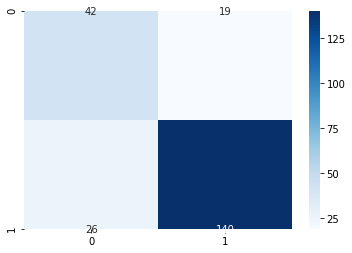

In [13]:
clf = GaussianNB()
clf.fit(X_train, y_train.values.flatten())
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('ROC AUC:', metrics.roc_auc_score(y_test, y_pred))
cnf_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_mtx, annot=True, cmap='Blues', fmt='g')

### 2. KNN

[d=manhattan] Best acc: 0.9383259911894273, with nvalues: 1
[d=manhattan] Best auc: 0.9007999209954572, with nvalues: 1
[d=manhattan] Best precision: 0.9367816091954023, with nvalues: 1
---------------------------
[d=euclidean] Best acc: 0.9030837004405287, with nvalues: 1
[d=euclidean] Best auc: 0.8404108236223584, with nvalues: 1
[d=euclidean] Best precision: 0.9, with nvalues: 1
---------------------------
[d=chebyshev] Best acc: 0.7797356828193832, with nvalues: 1
[d=chebyshev] Best auc: 0.6523800118506814, with nvalues: 1
[d=chebyshev] Best precision: 0.8020833333333334, with nvalues: 1
---------------------------
[d=minkowski] Best acc: 0.9030837004405287, with nvalues: 1
[d=minkowski] Best auc: 0.8404108236223584, with nvalues: 1
[d=minkowski] Best precision: 0.9, with nvalues: 1
---------------------------


<Figure size 432x288 with 0 Axes>

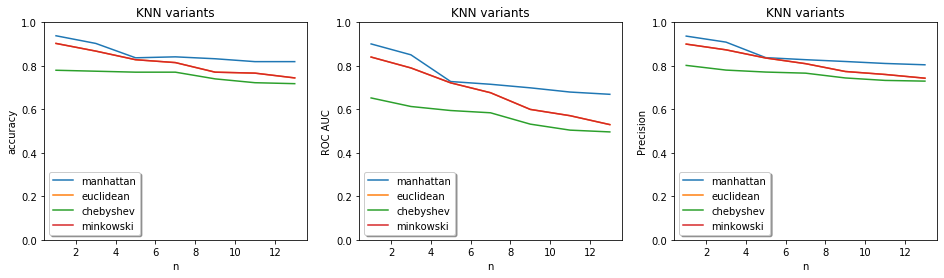

<Figure size 432x288 with 0 Axes>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

nvalues = [1, 3, 5, 7, 9, 11, 13]
dist = ['manhattan', 'euclidean', 'chebyshev', 'minkowski']
plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)

acc, auc, precision = {}, {}, {}
for d in dist:
    acc[d], auc[d], precision[d] = [], [], []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(X_train, y_train.values.flatten())
        y_pred = knn.predict(X_test)
        acc[d].append(metrics.accuracy_score(y_test, y_pred))
        auc[d].append(metrics.roc_auc_score(y_test, y_pred))
        precision[d].append(metrics.precision_score(y_test, y_pred))
    print(f'[d={d}] Best acc: {max(acc[d])}, with nvalues: {nvalues[np.argmax(acc[d])]}')
    print(f'[d={d}] Best auc: {max(auc[d])}, with nvalues: {nvalues[np.argmax(auc[d])]}')
    print(f'[d={d}] Best precision: {max(precision[d])}, with nvalues: {nvalues[np.argmax(precision[d])]}')
    print('---------------------------')

plt.figure()
func.multiple_line_chart(axs[0, 0], nvalues, acc, 'KNN variants', 'n', 'accuracy', percentage=True)
func.multiple_line_chart(axs[0, 1], nvalues, auc, 'KNN variants', 'n', 'ROC AUC', percentage=True)
func.multiple_line_chart(axs[0, 2], nvalues, precision, 'KNN variants', 'n', 'Precision', percentage=True)
plt.show()

## 3. Decision Tree

[criteria=0, d=3] Best acc: 0.748898678414097, with min_samples_leaf: 0.05
[criteria=0, d=3] Best auc: 0.7349891368753704, with min_samples_leaf: 0.01
[criteria=0, d=3] Best precision: 0.8758620689655172, with min_samples_leaf: 0.01
---------------------------
[criteria=0, d=5] Best acc: 0.8325991189427313, with min_samples_leaf: 0.0025
[criteria=0, d=5] Best auc: 0.7823424846928699, with min_samples_leaf: 0.01
[criteria=0, d=5] Best precision: 0.89171974522293, with min_samples_leaf: 0.01
---------------------------
[criteria=0, d=7] Best acc: 0.8281938325991189, with min_samples_leaf: 0.005
[criteria=0, d=7] Best auc: 0.8173019948647048, with min_samples_leaf: 0.01
[criteria=0, d=7] Best precision: 0.92, with min_samples_leaf: 0.01
---------------------------
[criteria=0, d=10] Best acc: 0.8414096916299559, with min_samples_leaf: 0.001
[criteria=0, d=10] Best auc: 0.8358680624135888, with min_samples_leaf: 0.01
[criteria=0, d=10] Best precision: 0.9379310344827586, with min_samples_l

<Figure size 432x288 with 0 Axes>

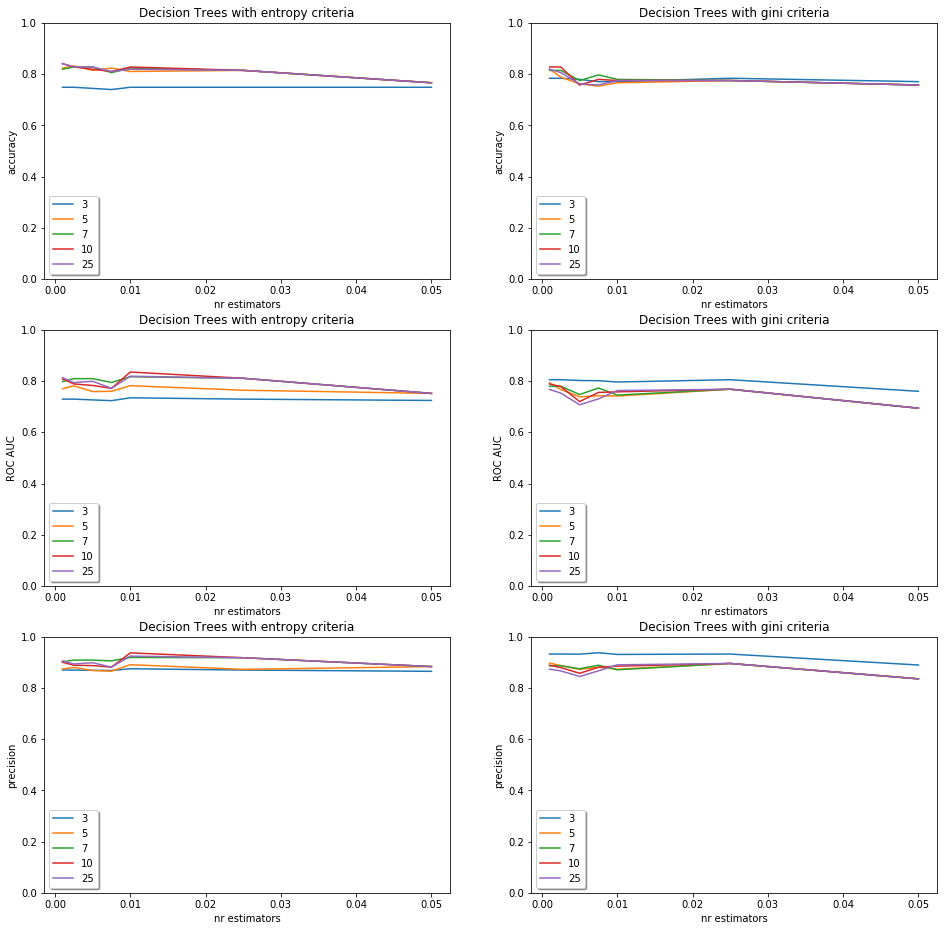

In [15]:
min_samples_leaf = [.05, .025, .01, .0075, .005, .0025, .001]
max_depths = [3, 5, 7, 10, 25]
criteria = ['entropy', 'gini']

plt.figure()
fig, axs = plt.subplots(3, 2, figsize=(16, 16), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    acc, auc, precision = {}, {}, {}

    for d in max_depths:
        acc[d], auc[d], precision[d] = [], [], []
        for n in min_samples_leaf:
            tree = DecisionTreeClassifier(min_samples_leaf=n, max_depth=d, criterion=f, class_weight='balanced')
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            acc[d].append(metrics.accuracy_score(y_test, y_pred))
            auc[d].append(metrics.roc_auc_score(y_test, y_pred))
            precision[d].append(metrics.precision_score(y_test, y_pred))
            
        print(f'[criteria={k}, d={d}] Best acc: {max(acc[d])}, with min_samples_leaf: {min_samples_leaf[np.argmax(acc[d])]}')
        print(f'[criteria={k}, d={d}] Best auc: {max(auc[d])}, with min_samples_leaf: {min_samples_leaf[np.argmax(auc[d])]}')
        print(f'[criteria={k}, d={d}] Best precision: {max(precision[d])}, with min_samples_leaf: {min_samples_leaf[np.argmax(precision[d])]}')
        print('---------------------------')

    func.multiple_line_chart(axs[0, k], min_samples_leaf, acc, 'Decision Trees with %s criteria'%f, 'nr estimators', 'accuracy', percentage=True)
    func.multiple_line_chart(axs[1, k], min_samples_leaf, auc, 'Decision Trees with %s criteria'%f, 'nr estimators', 'ROC AUC', percentage=True)
    func.multiple_line_chart(axs[2, k], min_samples_leaf, precision, 'Decision Trees with %s criteria'%f, 'nr estimators', 'precision', percentage=True)
    
plt.show()

## 4. Random Forest

[max_features=sqrt, d=3] Best acc: 0.8370044052863436, with n_estimators: 25
[max_features=sqrt, d=3] Best auc: 0.7810092830337744, with n_estimators: 10
[max_features=sqrt, d=3] Best precision: 0.8841463414634146, with n_estimators: 10
---------------------------
[max_features=sqrt, d=5] Best acc: 0.8590308370044053, with n_estimators: 25
[max_features=sqrt, d=5] Best auc: 0.7791823029824214, with n_estimators: 25
[max_features=sqrt, d=5] Best precision: 0.8681318681318682, with n_estimators: 25
---------------------------
[max_features=sqrt, d=7] Best acc: 0.8546255506607929, with n_estimators: 100
[max_features=sqrt, d=7] Best auc: 0.7502468891961288, with n_estimators: 100
[max_features=sqrt, d=7] Best precision: 0.8547486033519553, with n_estimators: 5
---------------------------
[max_features=sqrt, d=10] Best acc: 0.8502202643171806, with n_estimators: 100
[max_features=sqrt, d=10] Best auc: 0.7420501678846534, with n_estimators: 100
[max_features=sqrt, d=10] Best precision: 0.84

<Figure size 432x288 with 0 Axes>

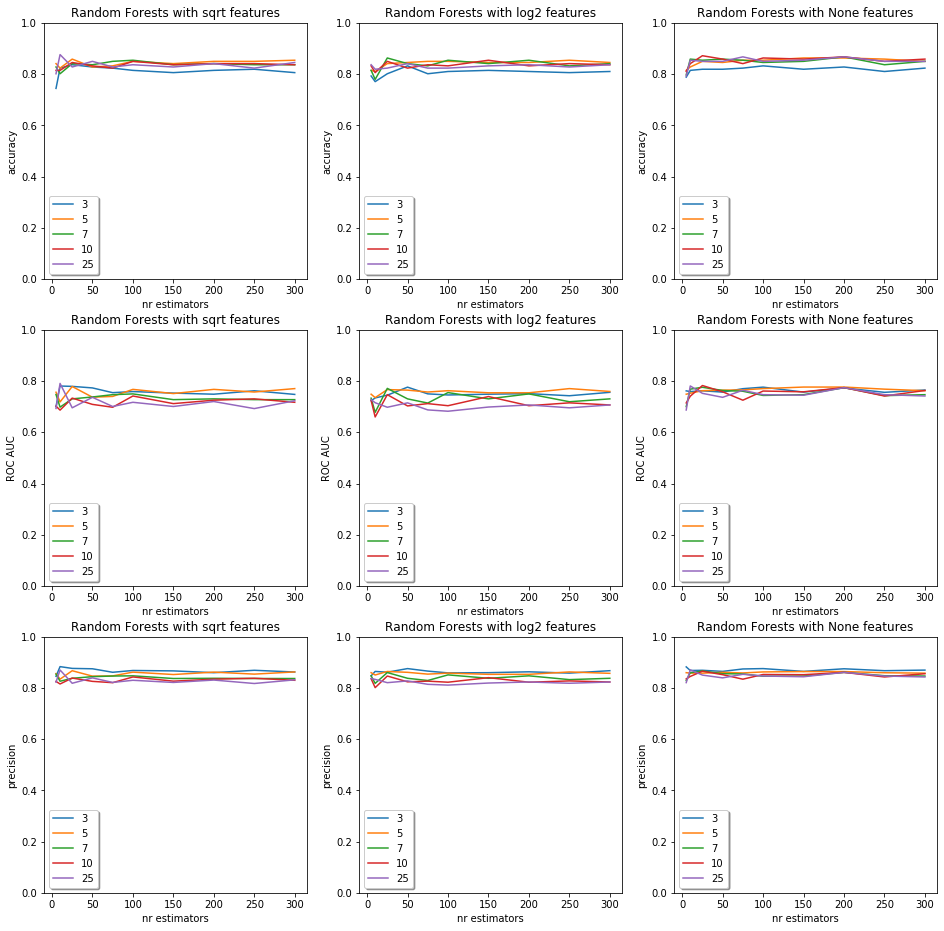

In [29]:
n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [3, 5, 7, 10, 25]
max_features = ['sqrt', 'log2', None]

plt.figure()
fig, axs = plt.subplots(3, len(max_features), figsize=(16, 16), squeeze=False)
for k, f in enumerate(max_features):
    acc, auc, precision = {}, {}, {}

    for d in max_depths:
        acc[d], auc[d], precision[d] = [], [], []
        for n in n_estimators:
            rf = RandomForestClassifier(n_estimators=n, max_depth=d, max_features=f, class_weight='balanced')
            rf.fit(X_train, y_train.values.flatten())
            y_pred = rf.predict(X_test)
            acc[d].append(metrics.accuracy_score(y_test, y_pred))
            auc[d].append(metrics.roc_auc_score(y_test, y_pred))
            precision[d].append(metrics.precision_score(y_test, y_pred))
            
        print(f'[max_features={f}, d={d}] Best acc: {max(acc[d])}, with n_estimators: {n_estimators[np.argmax(acc[d])]}')
        print(f'[max_features={f}, d={d}] Best auc: {max(auc[d])}, with n_estimators: {n_estimators[np.argmax(auc[d])]}')
        print(f'[max_features={f}, d={d}] Best precision: {max(precision[d])}, with n_estimators: {n_estimators[np.argmax(precision[d])]}')
        print('---------------------------')

    func.multiple_line_chart(axs[0, k], n_estimators, acc, 'Random Forests with %s features'%f, 'nr estimators', 'accuracy', percentage=True)
    func.multiple_line_chart(axs[1, k], n_estimators, auc, 'Random Forests with %s features'%f, 'nr estimators', 'ROC AUC', percentage=True)
    func.multiple_line_chart(axs[2, k], n_estimators, precision, 'Random Forests with %s features'%f, 'nr estimators', 'precision', percentage=True)
    
plt.show()

## 5. xgboost

In [17]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

[d=3] Best acc: 0.8546255506607929, with nb_steps: 9
[d=3] Best auc: 0.7731582065968794, with nb_steps: 59
[d=3] Best precision: 0.8666666666666667, with nb_steps: 59
---------------------------
[d=5] Best acc: 0.8810572687224669, with nb_steps: 47
[d=5] Best auc: 0.7994272170649813, with nb_steps: 47
[d=5] Best precision: 0.8756756756756757, with nb_steps: 47
---------------------------
[d=7] Best acc: 0.8634361233480177, with nb_steps: 15
[d=7] Best auc: 0.7770096780564882, with nb_steps: 21
[d=7] Best precision: 0.8648648648648649, with nb_steps: 21
---------------------------
[d=10] Best acc: 0.8634361233480177, with nb_steps: 41
[d=10] Best auc: 0.7666403318190796, with nb_steps: 41
[d=10] Best precision: 0.8571428571428571, with nb_steps: 41
---------------------------
[d=25] Best acc: 0.8678414096916299, with nb_steps: 45
[d=25] Best auc: 0.7852063993679637, with nb_steps: 63
[d=25] Best precision: 0.8695652173913043, with nb_steps: 63
---------------------------


<Figure size 432x288 with 0 Axes>

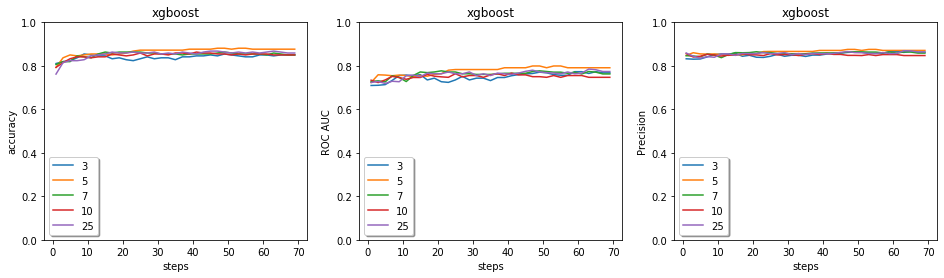

<Figure size 432x288 with 0 Axes>

In [31]:
nb_steps = list(range(1, 70, 2))
max_depths = [3, 5, 7, 10, 25]
plt.figure()
fig, axs = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)

acc, auc, precision = {}, {}, {}
for d in max_depths:
    acc[d], auc[d], precision[d] = [], [], []
    for n in nb_steps:
        param = {
            'eta': 0.3, 
            'max_depth': d,  
            'objective': 'multi:softprob',  
            'num_class': 2
        } 
        model = xgb.train(param, D_train, n)
        preds = model.predict(D_test)
        y_pred = np.asarray([np.argmax(line) for line in preds])

        acc[d].append(metrics.accuracy_score(y_test, y_pred))
        auc[d].append(metrics.roc_auc_score(y_test, y_pred))
        precision[d].append(metrics.precision_score(y_test, y_pred))
    
    print(f'[d={d}] Best acc: {max(acc[d])}, with nb_steps: {nb_steps[np.argmax(acc[d])]}')
    print(f'[d={d}] Best auc: {max(auc[d])}, with nb_steps: {nb_steps[np.argmax(auc[d])]}')
    print(f'[d={d}] Best precision: {max(precision[d])}, with nb_steps: {nb_steps[np.argmax(precision[d])]}')
    print('---------------------------')

plt.figure()
func.multiple_line_chart(axs[0, 0], nb_steps, acc, 'xgboost', 'steps', 'accuracy', percentage=True)
func.multiple_line_chart(axs[0, 1], nb_steps, auc, 'xgboost', 'steps', 'ROC AUC', percentage=True)
func.multiple_line_chart(axs[0, 2], nb_steps, precision, 'xgboost', 'steps', 'Precision', percentage=True)
plt.show()

## Export the notebook

In [19]:
import os
os.system(f'jupyter nbconvert --output html_notebooks/project-threshold-{CORRELATION_THRESHOLD}.html --to html Project1.ipynb')

0